# Machine Learning Model Evaluations and Predictions

## 6. Model fitting and selection
For the model fitting, I will try out the following
* Logistic regression in the primal space and with different kernels
* SVM in the primal and with different Kernels
* Ensemble models

In [ ]:
# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
# Function to give best model score and parameters
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)

In [ ]:
df.head()

,Age_Gap,Education,Economic_Similarity,Social_Similarities,Cultural_Similarities,Social_Gap,Common_Interests,Religion_Compatibility,No_Children_Previous Marriage,Desire_to_Marry,Independency,Relationship_with_Spouse Family,TradingIn,Engagement_Time,Love,Commitment,Mental_Health,Sense_of_Having_Children,Previous_Trading,Previous_Marriage,Proportion_Common_Genes,Addiction,Loyalty,Height_Ratio,Good_Income,Relation_Non_spouse_Before_Marriage,Spouse_Confirmed_by_Family,Divorce_Famil_Grade_1,Socializing_Opposite_Sex,Divorce
0,0.000000,0.229932,0.096503,0.759308,0.474368,0.486709,0.754950,0.835622,0.857419,0.205549,0.267719,0.724562,0.793190,0.492531,0.582400,0.602610,0.411376,0.857986,0.491675,0.452581,0.412411,0.523563,0.370996,0.307847,0.963629,0.116898,0.059026,0.139567,0.373549,1
1,0.337123,0.495896,0.828023,0.473800,0.295544,0.526305,0.099434,0.984033,0.848331,0.385596,0.659766,0.915260,0.635853,0.370515,0.439874,0.514752,0.616342,0.569775,0.322791,0.076881,0.838968,0.250099,0.695791,0.697908,0.403667,0.005282,0.029034,0.978815,0.182341,0
2,0.666787,0.448613,0.254234,0.583692,0.094550,0.760743,0.596572,0.410780,0.043509,0.443365,0.769188,0.153471,0.648788,0.618791,0.318568,0.942698,0.623775,0.202669,0.079159,0.822612,0.473247,0.642762,0.026840,0.602767,0.214390,0.827684,0.671753,1.000000,0.013354,1
3,0.529154,0.182523,0.671907,0.030305,0.000000,0.536283,1.000000,0.701627,0.600788,0.000000,0.061856,0.144279,0.318418,0.061220,0.731923,0.403826,0.275528,0.396422,0.374801,0.285427,0.940179,0.117281,1.000000,0.413694,0.427760,0.552300,0.611973,0.455621,0.793879,0
4,0.701873,0.856162,0.767425,0.249309,0.934559,0.730927,0.012434,0.107143,0.342199,0.895931,0.100091,0.811856,0.824137,0.908147,0.615743,0.565807,0.232412,1.000000,0.739379,0.036504,0.026684,0.753673,0.015125,0.915142,0.513915,0.992840,0.730326,0.031739,0.299709,0


In [ ]:
# Split Train, test data
df_train = df.sample(frac=0.7,random_state=200)
df_test = df.drop(df_train.index)
print(len(df_train))
print(len(df_test))

70
30


In [ ]:
# Fit primal logistic regression
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
log_primal_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=10, refit=True, verbose=0)
log_primal_Grid.fit(df_train.loc[:, df_train.columns != 'Divorce'],df_train.Divorce)
best_model(log_primal_Grid)

0.5571428571428572
{'C': 50, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 250, 'penalty': 'l2', 'tol': 1e-05}
LogisticRegression(C=50, max_iter=250, tol=1e-05)


In [ ]:
# Fit logistic regression with degree 2 polynomial kernel
param_grid = {'C': [0.1,10,50], 'max_iter': [300,500], 'fit_intercept':[True],'intercept_scaling':[1],'penalty':['l2'],
              'tol':[0.0001,0.000001]}
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(df_train.loc[:, df_train.columns != 'Divorce'])
log_pol2_Grid = GridSearchCV(LogisticRegression(solver = 'liblinear'),param_grid, cv=5, refit=True, verbose=0)
log_pol2_Grid.fit(df_train_pol2,df_train.Divorce)
best_model(log_pol2_Grid)

0.5857142857142857
{'C': 50, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 300, 'penalty': 'l2', 'tol': 0.0001}
LogisticRegression(C=50, max_iter=300, solver='liblinear')


In [ ]:
# Fit SVM with RBF Kernel
param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['rbf']}
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(df_train.loc[:, df_train.columns != 'Divorce'],df_train.Divorce)
best_model(SVM_grid)

0.5428743961352657
{'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
SVC(C=0.5, gamma=0.1, probability=True)


In [ ]:
# Fit SVM with pol kernel
param_grid = {'C': [0.5,1,10,50,100], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['poly'],'degree':[2,3] }
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(df_train.loc[:, df_train.columns != 'Divorce'],df_train.Divorce)
best_model(SVM_grid)

0.5428743961352657
{'C': 0.5, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly', 'probability': True}
SVC(C=0.5, degree=2, gamma=0.1, kernel='poly', probability=True)


In [ ]:
# Fit random forest classifier
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RanFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
RanFor_grid.fit(df_train.loc[:, df_train.columns != 'Divorce'],df_train.Divorce)
best_model(RanFor_grid)

0.6285714285714287
{'max_depth': 6, 'max_features': 9, 'min_samples_split': 5, 'n_estimators': 100}
RandomForestClassifier(max_depth=6, max_features=9, min_samples_split=5)


In [ ]:
# Fit Extreme Gradient boosting classifier
param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0)
xgb_grid.fit(df_train.loc[:, df_train.columns != 'Divorce'],df_train.Divorce)
best_model(xgb_grid)

0.6857142857142857
{'gamma': 0.01, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 5}
XGBClassifier(gamma=0.01, learning_rate=0.05, max_depth=5, n_estimators=5)


In [ ]:
# Fit primal logistic regression
log_primal = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=250,n_jobs=None, 
                                penalty='l2', random_state=None, solver='lbfgs',tol=1e-05, verbose=0, warm_start=False)
log_primal.fit(df_train.loc[:, df_train.columns != 'Divorce'],df_train.Divorce)

LogisticRegression(C=100, max_iter=250, tol=1e-05)

In [ ]:
# Fit logistic regression with pol 2 kernel
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(df_train.loc[:, df_train.columns != 'Divorce'])
log_pol2 = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=300, n_jobs=None, 
                              penalty='l2', random_state=None, solver='liblinear',tol=0.0001, verbose=0, warm_start=False)
log_pol2.fit(df_train_pol2,df_train.Divorce)

LogisticRegression(C=10, max_iter=300, solver='liblinear')

In [ ]:
# Fit SVM with RBF Kernel
SVM_RBF = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf', max_iter=-1, probability=True, 
              random_state=None, shrinking=True,tol=0.001, verbose=False)
SVM_RBF.fit(df_train.loc[:, df_train.columns != 'Divorce'],df_train.Divorce)

SVC(C=100, gamma=0.1, probability=True)

In [ ]:
# Fit SVM with Pol Kernel
SVM_POL = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,  decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',  max_iter=-1,
              probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False)
SVM_POL.fit(df_train.loc[:, df_train.columns != 'Divorce'],df_train.Divorce)

SVC(C=100, degree=2, gamma=0.1, kernel='poly', probability=True)

In [ ]:
# Fit Random Forest classifier
RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=8, max_features=6, max_leaf_nodes=None,min_impurity_decrease=0.0,
                        min_samples_leaf=1, min_samples_split=3,min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                            oob_score=False, random_state=None, verbose=0,warm_start=False)
RF.fit(df_train.loc[:, df_train.columns != 'Divorce'],df_train.Divorce)

RandomForestClassifier(max_depth=8, max_features=6, min_samples_split=3,
                       n_estimators=50)

In [ ]:
# Fit Extreme Gradient Boost Classifier
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bytree=1, gamma=0.01, learning_rate=0.1, max_delta_step=0,max_depth=7,
                    min_child_weight=5, missing=None, n_estimators=20,n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,reg_alpha=0, 
                    reg_lambda=1, scale_pos_weight=1, seed=None, silent=True, subsample=1)
XGB.fit(df_train.loc[:, df_train.columns != 'Divorce'],df_train.Divorce)

XGBClassifier(gamma=0.01, max_depth=7, min_child_weight=5, n_estimators=20,
              silent=True)

### Review best model fit accuracy : Keen interest is on the performance in predicting 1's (people who divorsed)

In [ ]:
print(classification_report(df_train.Divorce, log_primal.predict(df_train.loc[:, df_train.columns != 'Divorce'])))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75        32
           1       0.78      0.84      0.81        38

    accuracy                           0.79        70
   macro avg       0.79      0.78      0.78        70
weighted avg       0.79      0.79      0.78        70



In [ ]:
print(classification_report(df_train.Divorce,  log_pol2.predict(df_train_pol2)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        38

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



In [ ]:
print(classification_report(df_train.Divorce,  SVM_RBF.predict(df_train.loc[:, df_train.columns != 'Divorce'])))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        38

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



In [ ]:
print(classification_report(df_train.Divorce,  SVM_POL.predict(df_train.loc[:, df_train.columns != 'Divorce'])))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        38

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



In [ ]:
print(classification_report(df_train.Divorce,  RF.predict(df_train.loc[:, df_train.columns != 'Divorce'])))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        38

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



In [ ]:
print(classification_report(df_train.Divorce,  XGB.predict(df_train.loc[:, df_train.columns != 'Divorce'])))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77        32
           1       0.80      0.84      0.82        38

    accuracy                           0.80        70
   macro avg       0.80      0.80      0.80        70
weighted avg       0.80      0.80      0.80        70



In [ ]:
y = df_train.Divorce
X = df_train.loc[:, df_train.columns != 'Divorce']
X_pol2 = df_train_pol2
auc_log_primal, fpr_log_primal, tpr_log_primal = get_auc_scores(y, log_primal.predict(X),log_primal.predict_proba(X)[:,1])
auc_log_pol2, fpr_log_pol2, tpr_log_pol2 = get_auc_scores(y, log_pol2.predict(X_pol2),log_pol2.predict_proba(X_pol2)[:,1])
auc_SVM_RBF, fpr_SVM_RBF, tpr_SVM_RBF = get_auc_scores(y, SVM_RBF.predict(X),SVM_RBF.predict_proba(X)[:,1])
auc_SVM_POL, fpr_SVM_POL, tpr_SVM_POL = get_auc_scores(y, SVM_POL.predict(X),SVM_POL.predict_proba(X)[:,1])
auc_RF, fpr_RF, tpr_RF = get_auc_scores(y, RF.predict(X),RF.predict_proba(X)[:,1])
auc_XGB, fpr_XGB, tpr_XGB = get_auc_scores(y, XGB.predict(X),XGB.predict_proba(X)[:,1])

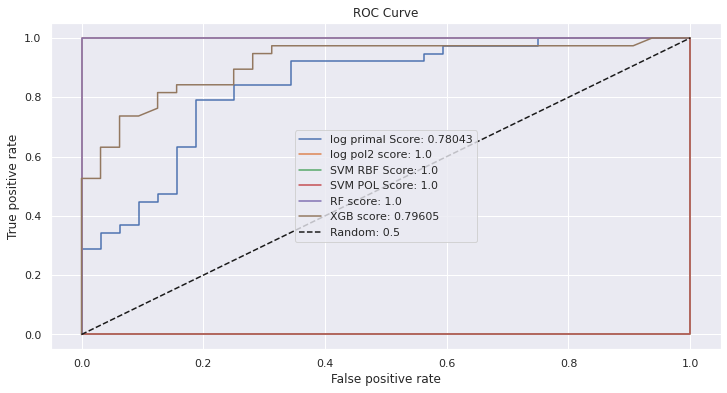

In [ ]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_log_primal, tpr_log_primal, label = 'log primal Score: ' + str(round(auc_log_primal, 5)))
plt.plot(fpr_log_pol2, tpr_log_pol2, label = 'log pol2 score: ' + str(round(auc_log_pol2, 5)))
plt.plot(fpr_SVM_RBF, tpr_SVM_RBF, label = 'SVM RBF Score: ' + str(round(auc_SVM_RBF, 5)))
plt.plot(fpr_SVM_POL, tpr_SVM_POL, label = 'SVM POL Score: ' + str(round(auc_SVM_POL, 5)))
plt.plot(fpr_RF, tpr_RF, label = 'RF score: ' + str(round(auc_RF, 5)))
plt.plot(fpr_XGB, tpr_XGB, label = 'XGB score: ' + str(round(auc_XGB, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

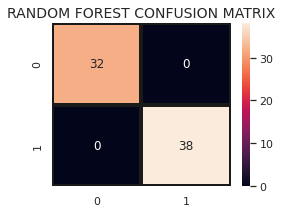

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(df_train.Divorce,  RF.predict(df_train.loc[:, df_train.columns != 'Divorce'])),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

### Model prediction accuracy on test data

In [ ]:
# Make the data transformation for test data
df_test.shape

(30, 30)

In [ ]:
# Fit logistic regression with pol 2 kernel
poly2 = PolynomialFeatures(degree=2)
df_test_pol2 = poly2.fit_transform(df_test.loc[:, df_test.columns != 'Divorce'])
log_pol2 = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=300, n_jobs=None, 
                              penalty='l2', random_state=None, solver='liblinear',tol=0.0001, verbose=0, warm_start=False)
log_pol2.fit(df_test_pol2,df_test.Divorce)

LogisticRegression(C=10, max_iter=300, solver='liblinear')

In [ ]:
y = df_test.Divorce
X = df_test.loc[:, df_train.columns != 'Divorce']
X_pol2 = df_test_pol2
auc_log_primal, fpr_log_primal, tpr_log_primal = get_auc_scores(y, log_primal.predict(X),log_primal.predict_proba(X)[:,1])
auc_log_pol2, fpr_log_pol2, tpr_log_pol2 = get_auc_scores(y, log_pol2.predict(X_pol2),log_pol2.predict_proba(X_pol2)[:,1])
auc_SVM_RBF, fpr_SVM_RBF, tpr_SVM_RBF = get_auc_scores(y, SVM_RBF.predict(X),SVM_RBF.predict_proba(X)[:,1])
auc_SVM_POL, fpr_SVM_POL, tpr_SVM_POL = get_auc_scores(y, SVM_POL.predict(X),SVM_POL.predict_proba(X)[:,1])
auc_RF, fpr_RF, tpr_RF = get_auc_scores(y, RF.predict(X),RF.predict_proba(X)[:,1])
auc_XGB, fpr_XGB, tpr_XGB = get_auc_scores(y, XGB.predict(X),XGB.predict_proba(X)[:,1])

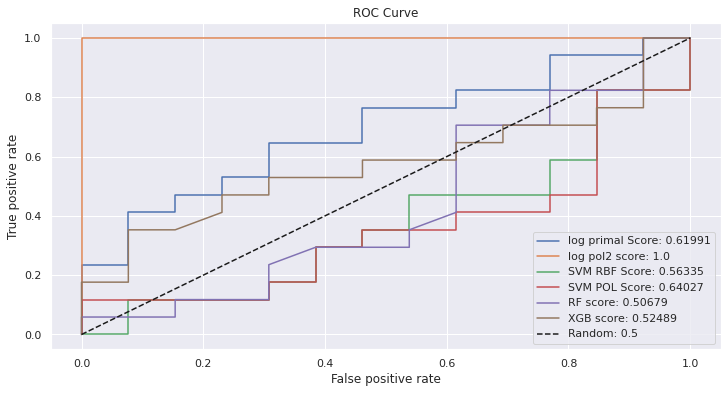

In [ ]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_log_primal, tpr_log_primal, label = 'log primal Score: ' + str(round(auc_log_primal, 5)))
plt.plot(fpr_log_pol2, tpr_log_pol2, label = 'log pol2 score: ' + str(round(auc_log_pol2, 5)))
plt.plot(fpr_SVM_RBF, tpr_SVM_RBF, label = 'SVM RBF Score: ' + str(round(auc_SVM_RBF, 5)))
plt.plot(fpr_SVM_POL, tpr_SVM_POL, label = 'SVM POL Score: ' + str(round(auc_SVM_POL, 5)))
plt.plot(fpr_RF, tpr_RF, label = 'RF score: ' + str(round(auc_RF, 5)))
plt.plot(fpr_XGB, tpr_XGB, label = 'XGB score: ' + str(round(auc_XGB, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

In [ ]:
print(classification_report(df_test.Divorce,  log_pol2.predict(df_test_pol2)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



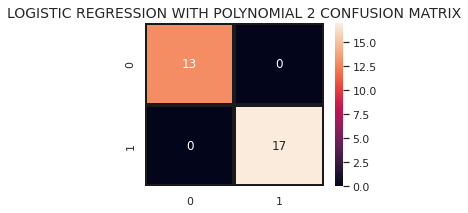

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(df_test.Divorce,  log_pol2.predict(df_test_pol2)),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION WITH POLYNOMIAL 2 CONFUSION MATRIX",fontsize=14)
plt.show()

#Conclusion:
In this study, we explored the Kaggle marriage and divorce dataset.
We begin by understanding the data and the attributes. We performed exploratory data analysis, which included feature selection, feature importance, normalisation, and data visualisation. We found out that loyalty and education are the most important features for divorce. After that, we preprocessed the data to ensure that our model had good accuracy and recall scores. To predict who will get divorced, we have tested a variety of models. The ROC curve for each model was then plotted in order to better understand behavioural patterns. For the both Training and Testing Data set, we have plotted the ROC curve.
But in this case, we are amazed to realise that Random Forest is giving us 100% accuracy on the training dataset. But using Random Forest, our accuracy on the testing dataset is only about 50%, but using logistic regression with the kernel polynomial degree 2, our accuracy is 100%. So finally we will be using logistic regression with the kernel polynomial degree 2 model for Divorce prediction.Our dataset was very small so we can not generalise this for any new dataset. the results may vary and have to be revised again.
